# Data Mining Project.

In [17]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import argmax
from math import sqrt
import time
from collections import Counter
import itertools

# preprocessing
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, cross_val_score, GridSearchCV, KFold, RepeatedKFold #HalvingGridSearchCV, 

# scoring and algorithm selection packages
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from math import sqrt

# model tools
import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats
from scipy.stats import norm


from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, HuberRegressor,  Lars, Lasso, SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb


# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings (gets rid of Pandas copy warnings)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [7]:
#Loading data.
Housing_data = pd.read_csv("kc_house_data.csv")

In [8]:
#Checking the dimension of the table
print("The dimension of the table is: ", Housing_data.shape)

The dimension of the table is:  (21613, 21)


In [9]:
#Displaying the data
print(Housing_data.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [10]:
Housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


NameError: name 'plt' is not defined

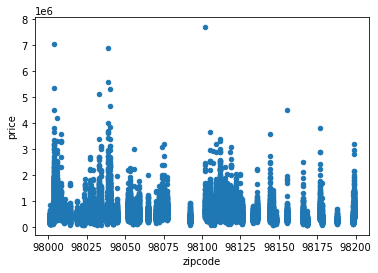

In [11]:
#Plotting Scatter plot of the data.
Housing_data.plot(x='zipcode', y = 'price', kind = 'scatter')
plt.xlabel('ZIP Code')
plt.ylabel('Housing Prices')
plt.title('Housing prices in different locations')
plt.show

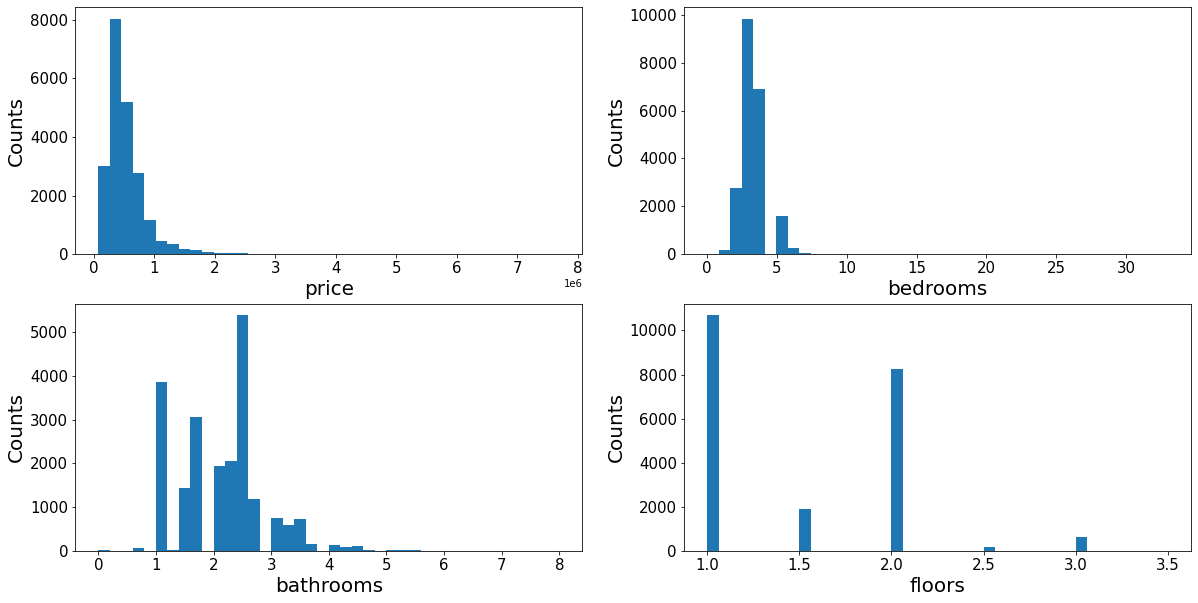

In [7]:
#Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['price', 'bedrooms', 'bathrooms',  'floors']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(Housing_data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

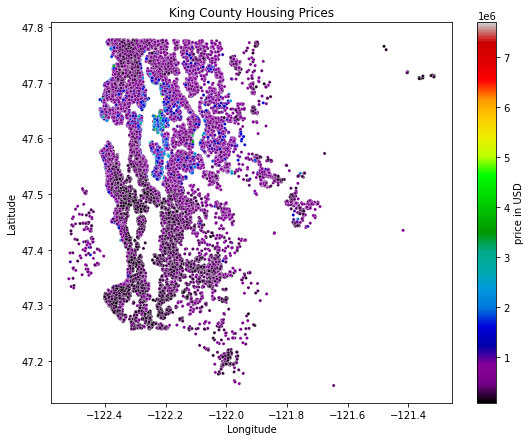

In [8]:
# Plot scatter plot
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = Housing_data['long'], y = Housing_data['lat'], hue = Housing_data['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = Housing_data)

norm = plt.Normalize(Housing_data['price'].min(), Housing_data['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County Housing Prices')
plt.show()

<AxesSubplot:>

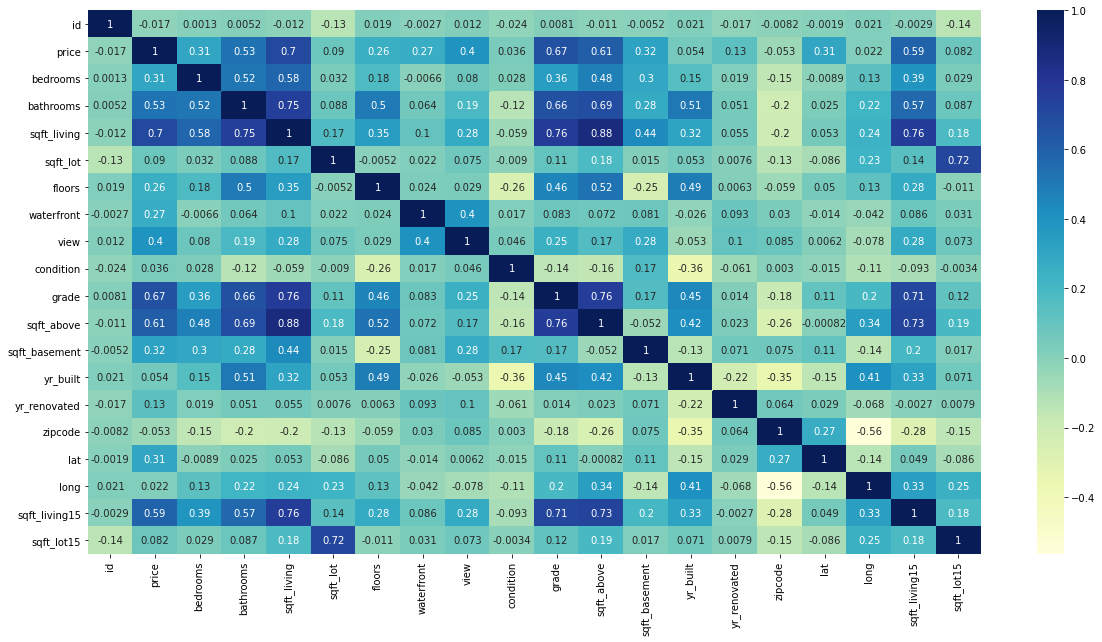

In [9]:
#heatmap for all the required features for correlation

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(Housing_data.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

In [10]:
#Checking for null values.
Housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#function to fill the missing value with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

#applying the function.
fill_na_median(Housing_data)

# check the result
print(Housing_data.describe().T)

                 count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+

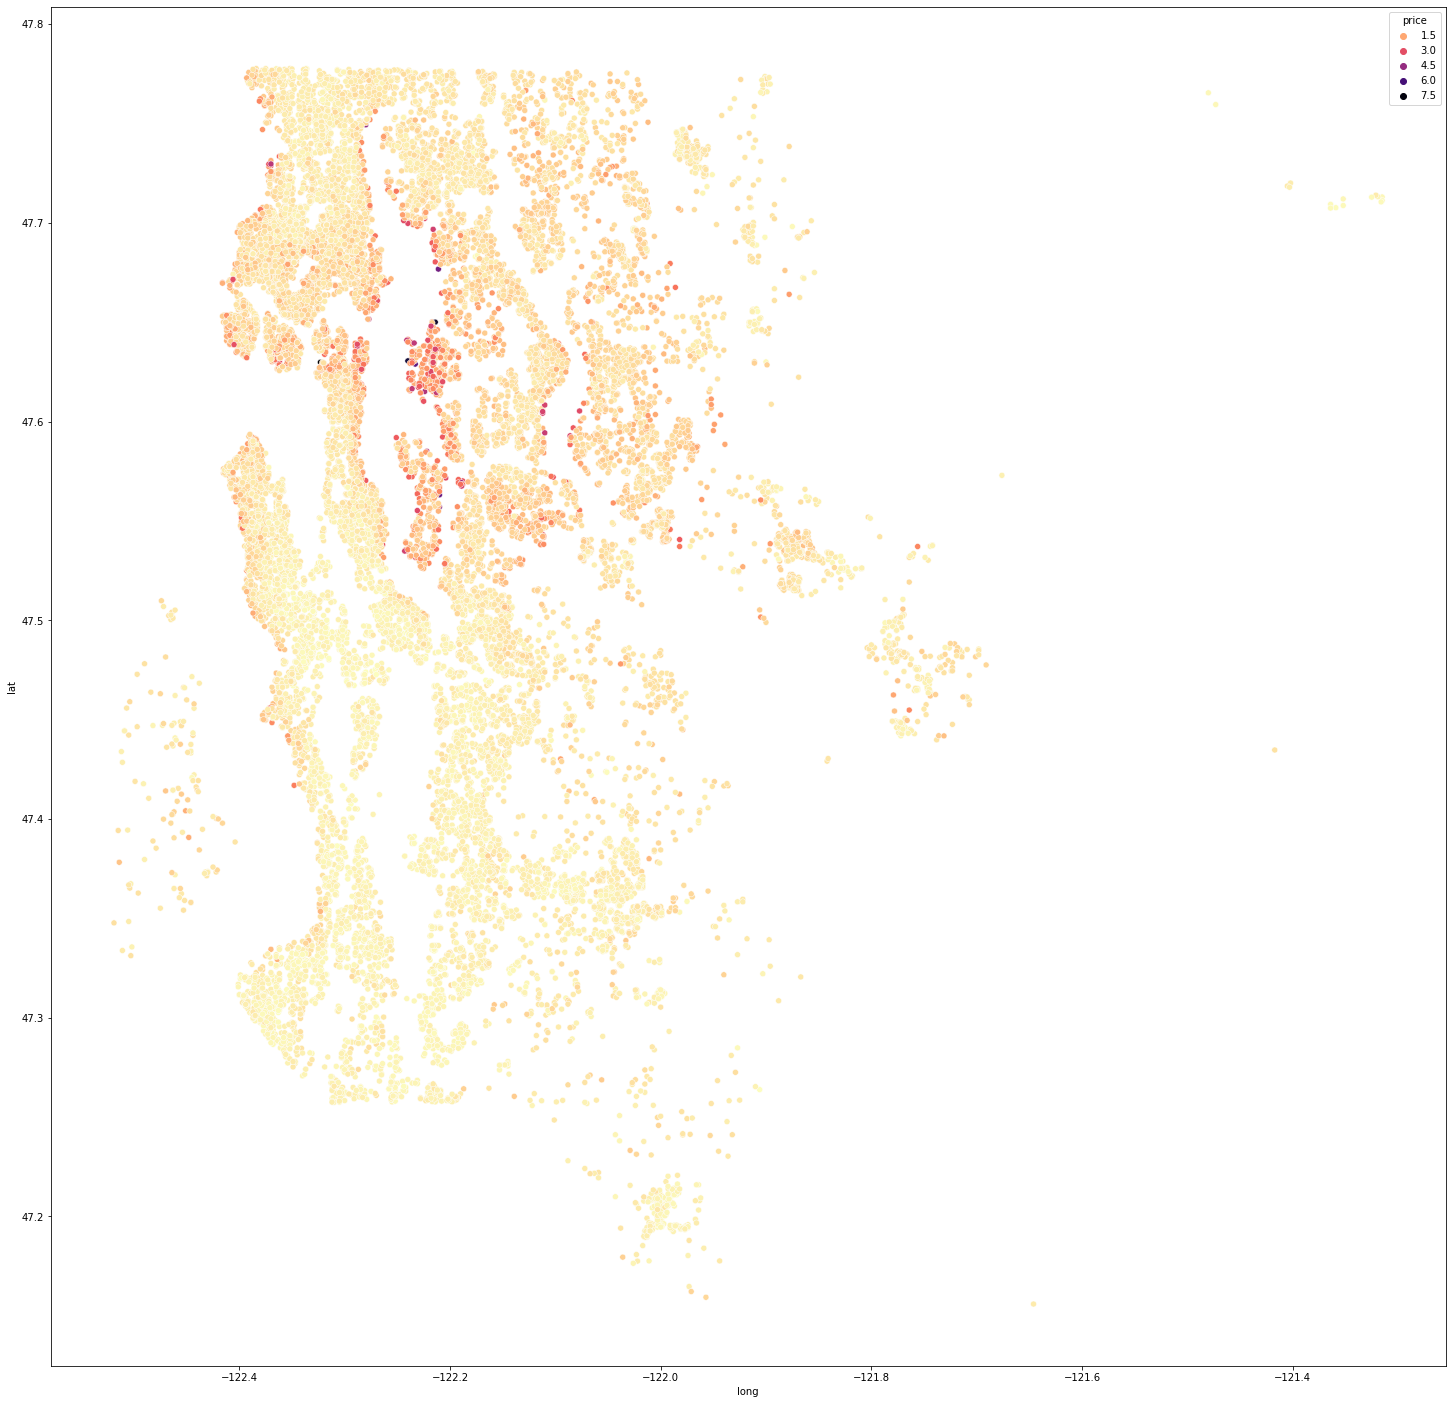

In [12]:
#There are no missing values.
#Checking for outlier.
plt.figure(figsize=(25,25))
sns.scatterplot(data = Housing_data, x="long", y="lat", hue="price", palette="magma_r");

In [13]:
#Changing the datetime format
Housing_data['date']= pd.to_datetime(Housing_data['date'])
Housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
#Converting the values for sqft_basement, waterfront, view into binary.
Housing_data['sqft_basement']= Housing_data['sqft_basement'].map(lambda x: 1 if x>0 else x)
Housing_data['waterfront']= Housing_data['waterfront'].map(lambda x: 1 if x>0 else x)
Housing_data['view']= Housing_data['view'].map(lambda x: 1 if x>0 else x)

In [15]:
# function for log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

Housing_data['grade_log1p'] = log_transformation(Housing_data['grade'])

# check the data
print(Housing_data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.098274      3.409430   
std    4.142051e+04      0.539989      0.086517    

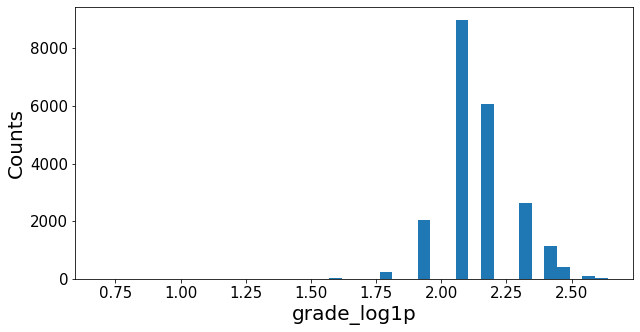

In [16]:
#adjust skewed data (grade)
#check the distribution using histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(Housing_data['grade_log1p'], bins=40)
plt.xlabel('grade_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

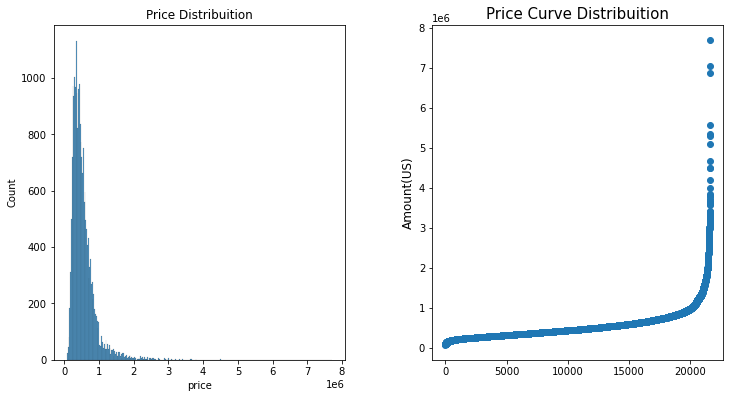

In [17]:
#knowing the price variable
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.histplot(Housing_data['price'])

plt.subplot(122)
g1 = plt.scatter(range(Housing_data.shape[0]), np.sort(Housing_data.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [18]:
#We are trying to predict the housing prices here.
#The value to be predicted is continuous,we will take a look into linear regression and gradient boosting regressions algorithms.
#Linear Regression.

#Initialize Linear Regression
reg=LinearRegression()

#Initialize the value to be predicted(label) as price
labels=Housing_data['price']

#convert date into a readable data-type by the algorithm
#since the date variable had only 2014 and 2015, the date column can be trasformed into a nominal category with 1 representing 2014 and 0 representing 2015.

conv_dates = [1 if values == 2014 else 0 for values in Housing_data.date ]
Housing_data['date']=conv_dates

#drop columns not used in training.
#id, yr_built, condition and long (longitute) are droped because the have low corelation/significance on the target.
#price is also droped since it is not used as part of the independent variables.

train1 = Housing_data.drop(['id', 'price','condition','yr_built','long'],axis=1)

#cross validation
#70%, 30% train, test split

x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.3,random_state =5)

#Fitting the regression algorithm with data from the train set.
#x_train represents the predictors (independent variables) and y_train represents the target.

reg.fit(x_train,y_train)

LinearRegression()

In [19]:
#Testing our accuracy.
accuracy_LR=reg.score(x_test,y_test)
print(str("The Coefficient of determination is: "+str("%.2f" %(accuracy_LR*100))+"%"))

The Coefficient of determination is: 68.90%


In [20]:
#RMSE
y_prediction1 = reg.predict(x_test)
RMSE_lin = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction1))
print(RMSE_lin)

207697.45877422238


In [21]:
#Gradient Boosting Regressor

gbr=GradientBoostingRegressor(n_estimators= 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.08, loss = 'ls')
train2 = Housing_data.drop(['id', 'price','condition','yr_built','long'],axis=1)

#Cross validation
#70%, 30% train, test split
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(train2 , labels , test_size = 0.3,random_state =5)

gbr.fit(x_train1,y_train1)

#Testing for accuracy
accuracy_gbr=gbr.score(x_test1,y_test1)
print(str("The Coefficient of determination is: "+str("%.2f" %(accuracy_gbr*100))+"%"))

The Coefficient of determination is: 88.76%


In [22]:
#RMSE
y_prediction = gbr.predict(x_test)
RMSE_gbr = sqrt(mean_squared_error(y_true = y_test1, y_pred = y_prediction))
print(RMSE_gbr)

124835.05643127441


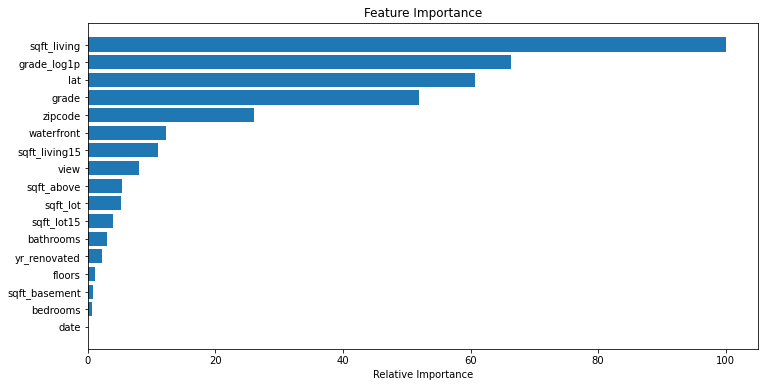

In [23]:
#Feature Importance
#Feature importance shows significance of predictors of variables on the target after training using GBR.
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

In [24]:
#Since the accuracy is better of gradient boosting.I will be exploring it further. 
#Exploring some arbitrary params of Gradient Boosting Regressor.
gbr=GradientBoostingRegressor(n_estimators= 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.08, loss = 'ls')
gbr.fit(x_train1, y_train1)

GradientBoostingRegressor(learning_rate=0.08, loss='ls', max_depth=5,
                          n_estimators=400)

In [25]:
y_hat = gbr.predict(x_test1)
gbr.score(x_test1,y_test1)

0.8887833293387583

In [26]:
#Parameter Tuning Gradient Boosting.
'''
Since Gradient Boosting performs best with optimal parameter tuning, let's try to find the optimal hyperparameters.
Some of the parameters to try out.
n_estimators: Number of boosts to perform.
max_dept: number of tree nodes to look for before making prediction.
min_child_weight: minimum sum of instance weight needed in child.
gamma: minimum loss redustion to make another partition on a leaf rope.
subsample: ratio os training sets.
colsample_by_tree: ratio of columns while making a tree.
alpha: L1 regularization.
learning_rate: Tuning this setting alters how much the model corrects after it runs a boost.
'''

"\nSince Gradient Boosting performs best with optimal parameter tuning, let's try to find the optimal hyperparameters.\nSome of the parameters to try out.\nn_estimators: Number of boosts to perform.\nmax_dept: number of tree nodes to look for before making prediction.\nmin_child_weight: minimum sum of instance weight needed in child.\ngamma: minimum loss redustion to make another partition on a leaf rope.\nsubsample: ratio os training sets.\ncolsample_by_tree: ratio of columns while making a tree.\nalpha: L1 regularization.\nlearning_rate: Tuning this setting alters how much the model corrects after it runs a boost.\n"

In [27]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV, KFold, RepeatedKFold 

In [28]:
# Taking a model and a grid of hyperparameters, and running a HalvingGridSearch

def grid_optimizer(model, grid, x, y):    
    
    start=time.time()
    
    print("Making Search")
    grid_search = HalvingGridSearchCV(model, grid, verbose=10, scoring='neg_mean_absolute_error', cv=5, min_resources='exhaust')

    print("Running Grid")
    grid_search.fit(x, y)

    grid_search.best_estimator_
    
    # Best f1
    print('Best mae: %.3f' % grid_search.best_score_)

    print("Best parameters set found on train set: \n")
    print(grid_search.best_params_)
    print("\nGrid scores on train set:\n")
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
    print(f'Elapsed Time: {time.time() - start}')
    
    return grid_search.best_params_

In [29]:
#setting a random seed for the notebook for all the train/test splits for the data.
randomstate = 30785

In [30]:
param_grid = {"max_depth": [5, 10],
              "min_child_weight" : [2, 7],
              'eta': [.05, .1],
              }

xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1)

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5043
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 5043
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START eta=0.05, max_depth=5, min_child_weight=2...................
[CV 1/5; 1/8] END eta=0.05, max_depth=5, min_child_weight=2;, score=(train=-41306.163, test=-76754.038) total time=   1.6s
[CV 2/5; 1/8] START eta=0.05, max_depth=5, min_child_weight=2...................
[CV 2/5; 1/8] END eta=0.05, max_depth=5, min_child_weight=2;, score=(train=-40690.317, test=-78924.592) total time=   1.4s
[CV 3/5; 1/8] START eta=0.05, max_depth=5, min_child_weight=2...................
[CV 3/5; 1/8] END eta=0.05, max_depth=5, min_child_weight=2;, score=(train=-42440.496, test=-76793.957) total time=   1.2s
[CV 4/5; 1/8] START eta=0.05, max_depth=5, min_child_weight=2...................
[CV 4/5; 1/8] END 

[CV 5/5; 8/8] END eta=0.1, max_depth=10, min_child_weight=7;, score=(train=-14759.637, test=-83327.196) total time=   2.6s
----------
iter: 1
n_candidates: 3
n_resources: 15129
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START eta=0.05, max_depth=5, min_child_weight=7...................
[CV 1/5; 1/3] END eta=0.05, max_depth=5, min_child_weight=7;, score=(train=-54284.844, test=-73366.113) total time=   3.7s
[CV 2/5; 1/3] START eta=0.05, max_depth=5, min_child_weight=7...................
[CV 2/5; 1/3] END eta=0.05, max_depth=5, min_child_weight=7;, score=(train=-54980.935, test=-72141.348) total time=   3.7s
[CV 3/5; 1/3] START eta=0.05, max_depth=5, min_child_weight=7...................
[CV 3/5; 1/3] END eta=0.05, max_depth=5, min_child_weight=7;, score=(train=-54064.951, test=-72099.393) total time=   3.3s
[CV 4/5; 1/3] START eta=0.05, max_depth=5, min_child_weight=7...................
[CV 4/5; 1/3] END eta=0.05, max_depth=5, min_child_weight=7;, score=(t

In [31]:
param_grid = {"max_depth": [3, 7],
              "min_child_weight" : [2, 5],
              'eta': [.1, .3],
              }

xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1)

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5043
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 5043
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START eta=0.1, max_depth=3, min_child_weight=2....................
[CV 1/5; 1/8] END eta=0.1, max_depth=3, min_child_weight=2;, score=(train=-51235.842, test=-79026.159) total time=   1.0s
[CV 2/5; 1/8] START eta=0.1, max_depth=3, min_child_weight=2....................
[CV 2/5; 1/8] END eta=0.1, max_depth=3, min_child_weight=2;, score=(train=-51206.022, test=-79235.924) total time=   1.0s
[CV 3/5; 1/8] START eta=0.1, max_depth=3, min_child_weight=2....................
[CV 3/5; 1/8] END eta=0.1, max_depth=3, min_child_weight=2;, score=(train=-51863.060, test=-81663.557) total time=   1.0s
[CV 4/5; 1/8] START eta=0.1, max_depth=3, min_child_weight=2....................
[CV 4/5; 1/8] END eta

[CV 5/5; 8/8] END eta=0.3, max_depth=7, min_child_weight=5;, score=(train=-2001.907, test=-90097.769) total time=   1.6s
----------
iter: 1
n_candidates: 3
n_resources: 15129
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START eta=0.1, max_depth=7, min_child_weight=5....................
[CV 1/5; 1/3] END eta=0.1, max_depth=7, min_child_weight=5;, score=(train=-29045.138, test=-73465.259) total time=   3.9s
[CV 2/5; 1/3] START eta=0.1, max_depth=7, min_child_weight=5....................
[CV 2/5; 1/3] END eta=0.1, max_depth=7, min_child_weight=5;, score=(train=-29368.704, test=-70208.608) total time=   3.5s
[CV 3/5; 1/3] START eta=0.1, max_depth=7, min_child_weight=5....................
[CV 3/5; 1/3] END eta=0.1, max_depth=7, min_child_weight=5;, score=(train=-29330.529, test=-71946.981) total time=   3.4s
[CV 4/5; 1/3] START eta=0.1, max_depth=7, min_child_weight=5....................
[CV 4/5; 1/3] END eta=0.1, max_depth=7, min_child_weight=5;, score=(train=-

In [32]:
param_grid = {'gamma': [0, .6],
              'subsample':[.6, 1],

              }

xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1,
                max_depth = 7,
                eta = .1,
                min_child_weight = 5)

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5043
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 5043
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START gamma=0, subsample=0.6......................................
[CV 1/5; 1/4] END gamma=0, subsample=0.6;, score=(train=-17916.664, test=-83864.982) total time=   1.7s
[CV 2/5; 1/4] START gamma=0, subsample=0.6......................................
[CV 2/5; 1/4] END gamma=0, subsample=0.6;, score=(train=-20828.801, test=-78556.683) total time=   1.6s
[CV 3/5; 1/4] START gamma=0, subsample=0.6......................................
[CV 3/5; 1/4] END gamma=0, subsample=0.6;, score=(train=-17035.138, test=-81306.010) total time=   1.6s
[CV 4/5; 1/4] START gamma=0, subsample=0.6......................................
[CV 4/5; 1/4] END gamma=0, subsample=0.6;, score=(train=-19926.807, test=-8

In [33]:
param_grid = {'colsample_bytree':[.6, 1],
              'subsample':[.3, .6],
              }

xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1,
                max_depth = 7,
                eta = .1,
                min_child_weight = 5,

                )

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5043
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 5043
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START colsample_bytree=0.6, subsample=0.3.........................
[CV 1/5; 1/4] END colsample_bytree=0.6, subsample=0.3;, score=(train=-37318.164, test=-89227.254) total time=   1.0s
[CV 2/5; 1/4] START colsample_bytree=0.6, subsample=0.3.........................
[CV 2/5; 1/4] END colsample_bytree=0.6, subsample=0.3;, score=(train=-38899.800, test=-84692.539) total time=   1.1s
[CV 3/5; 1/4] START colsample_bytree=0.6, subsample=0.3.........................
[CV 3/5; 1/4] END colsample_bytree=0.6, subsample=0.3;, score=(train=-36568.414, test=-82363.100) total time=   1.1s
[CV 4/5; 1/4] START colsample_bytree=0.6, subsample=0.3.........................
[CV 4/5; 1/4] END colsample_bytree=0

In [34]:
param_grid = {'colsample_bytree':[.2, .4, .6],
              }

xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1,
                max_depth = 7,
                eta = .1,
                min_child_weight = 5,
                subsample = .6,
                )

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5043
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 5043
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START colsample_bytree=0.2........................................
[CV 1/5; 1/3] END colsample_bytree=0.2;, score=(train=-31576.128, test=-80424.707) total time=   0.9s
[CV 2/5; 1/3] START colsample_bytree=0.2........................................
[CV 2/5; 1/3] END colsample_bytree=0.2;, score=(train=-31854.903, test=-90186.401) total time=   0.9s
[CV 3/5; 1/3] START colsample_bytree=0.2........................................
[CV 3/5; 1/3] END colsample_bytree=0.2;, score=(train=-36207.939, test=-77808.484) total time=   0.9s
[CV 4/5; 1/3] START colsample_bytree=0.2........................................
[CV 4/5; 1/3] END colsample_bytree=0.2;, score=(train=-32993.537, test=-92763.077

In [35]:
param_grid = {'reg_alpha':[1e-5, 1, 100],
              'reg_lambda':[1e-5, 1, 100],

              }

xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1,
                max_depth = 7,
                eta = .1,
                min_child_weight = 5,
                subsample = .6,
                colsample_bytree = .4,
)

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 1681
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 1681
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START reg_alpha=1e-05, reg_lambda=1e-05...........................
[CV 1/5; 1/9] END reg_alpha=1e-05, reg_lambda=1e-05;, score=(train=-7540.830, test=-97960.311) total time=   0.7s
[CV 2/5; 1/9] START reg_alpha=1e-05, reg_lambda=1e-05...........................
[CV 2/5; 1/9] END reg_alpha=1e-05, reg_lambda=1e-05;, score=(train=-6876.011, test=-82170.774) total time=   0.7s
[CV 3/5; 1/9] START reg_alpha=1e-05, reg_lambda=1e-05...........................
[CV 3/5; 1/9] END reg_alpha=1e-05, reg_lambda=1e-05;, score=(train=-6156.087, test=-100357.170) total time=   0.6s
[CV 4/5; 1/9] START reg_alpha=1e-05, reg_lambda=1e-05...........................
[CV 4/5; 1/9] END reg_alpha=1e-05, reg_lambd

[CV 2/5; 9/9] END reg_alpha=100, reg_lambda=100;, score=(train=-43292.875, test=-79866.137) total time=   0.6s
[CV 3/5; 9/9] START reg_alpha=100, reg_lambda=100...............................
[CV 3/5; 9/9] END reg_alpha=100, reg_lambda=100;, score=(train=-41789.318, test=-94738.702) total time=   0.6s
[CV 4/5; 9/9] START reg_alpha=100, reg_lambda=100...............................
[CV 4/5; 9/9] END reg_alpha=100, reg_lambda=100;, score=(train=-42981.542, test=-82206.317) total time=   0.6s
[CV 5/5; 9/9] START reg_alpha=100, reg_lambda=100...............................
[CV 5/5; 9/9] END reg_alpha=100, reg_lambda=100;, score=(train=-48787.365, test=-76233.797) total time=   0.6s
----------
iter: 1
n_candidates: 3
n_resources: 5043
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START reg_alpha=1e-05, reg_lambda=100.............................
[CV 1/5; 1/3] END reg_alpha=1e-05, reg_lambda=100;, score=(train=-53400.409, test=-81431.945) total time=   1.1s
[CV 2/

In [36]:
param_grid = {'reg_lambda':[25, 50, 100],

              }

xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1,
                max_depth = 7,
                eta = .1,
                min_child_weight = 5,
                subsample=.6,
                colsample_bytree = .4,
                reg_alpha = 1e-5,
)

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5043
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 5043
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START reg_lambda=25...............................................
[CV 1/5; 1/3] END reg_lambda=25;, score=(train=-40195.936, test=-74905.299) total time=   1.1s
[CV 2/5; 1/3] START reg_lambda=25...............................................
[CV 2/5; 1/3] END reg_lambda=25;, score=(train=-42947.644, test=-81386.540) total time=   1.1s
[CV 3/5; 1/3] START reg_lambda=25...............................................
[CV 3/5; 1/3] END reg_lambda=25;, score=(train=-36197.936, test=-74211.880) total time=   1.3s
[CV 4/5; 1/3] START reg_lambda=25...............................................
[CV 4/5; 1/3] END reg_lambda=25;, score=(train=-36724.461, test=-76702.131) total time=   1.4s
[CV 5/5

In [37]:
param_grid = {'n_estimators' : [500, 750, 1000],
              }

xgbr = xgb.XGBRegressor(
                #n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1,
                max_depth = 7,
                eta = .1,
                min_child_weight = 5,
                subsample = .6,
                colsample_bytree = .4,
                reg_alpha = 1e-5,
                reg_lambda = 50)

best_params = grid_optimizer(xgbr, param_grid, x_train1, y_train1)

Making Search
Running Grid
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5043
max_resources_: 15129
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 5043
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START n_estimators=500............................................
[CV 1/5; 1/3] END n_estimators=500;, score=(train=-43356.958, test=-80791.673) total time=   1.2s
[CV 2/5; 1/3] START n_estimators=500............................................
[CV 2/5; 1/3] END n_estimators=500;, score=(train=-44489.554, test=-78664.517) total time=   1.1s
[CV 3/5; 1/3] START n_estimators=500............................................
[CV 3/5; 1/3] END n_estimators=500;, score=(train=-43367.544, test=-79440.337) total time=   1.3s
[CV 4/5; 1/3] START n_estimators=500............................................
[CV 4/5; 1/3] END n_estimators=500;, score=(train=-43272.536, test=-73528.443) total time=   

In [38]:
xgbr = xgb.XGBRegressor(
                n_estimators=500,
                seed=randomstate,
                missing=0,
                eval_metric='mae',
                verbosity=1,
                max_depth = 7,
                eta = .1,
                min_child_weight = 5,
                subsample=.6,
                colsample_bytree = .4,
                reg_alpha = 1e-5,
                reg_lambda = 50)